# Single Layer Perceptron


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv(".././Datasets/Perceptron/data.csv")
dataset.head()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,70,1,4,130,322,0,2,109,0,24,2,3,3,2
1,67,0,3,115,564,0,2,160,0,16,2,0,7,1
2,57,1,2,124,261,0,0,141,0,3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,2,1,1,3,1


In [2]:
dataset.describe()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,8.900000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,11.003936,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,4.000000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,15.000000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,62.000000,3.000000,3.000000,7.000000,2.000000


## Visualizations

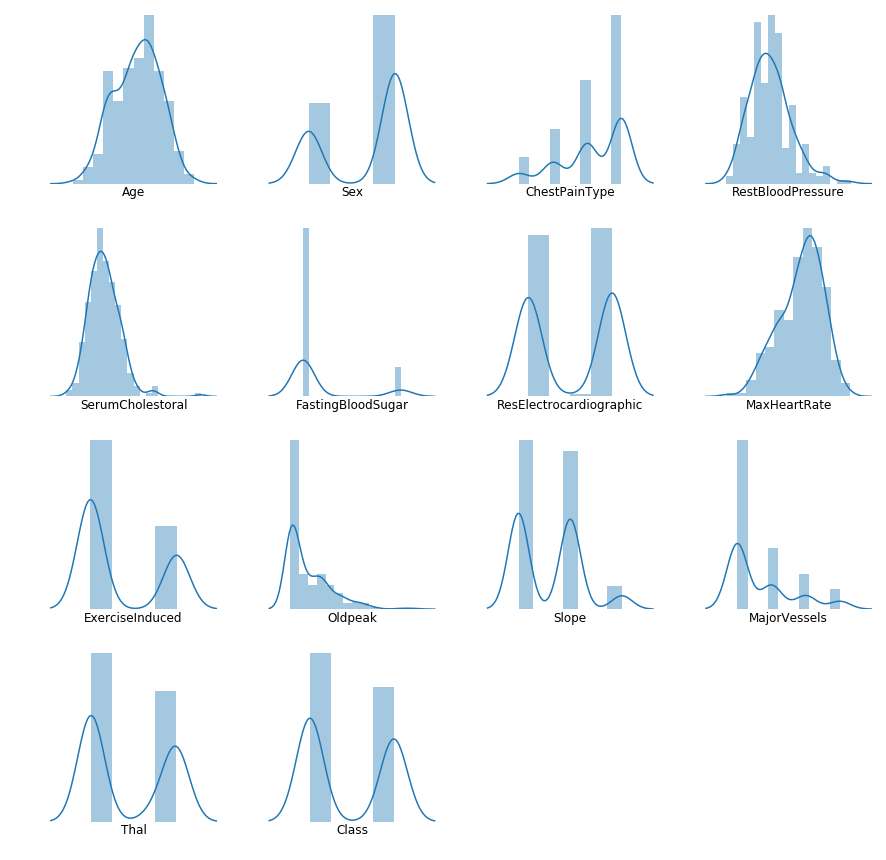

In [3]:
matplotlib.rcParams['figure.figsize']=(15,15)
for i in range(len(dataset.columns)):
    plt.subplot(4, 4, i+1)
    sns.distplot(dataset[dataset.columns[i]])
    plt.title(dataset.columns[i], y=-0.1)
    plt.axis("off")
plt.show()

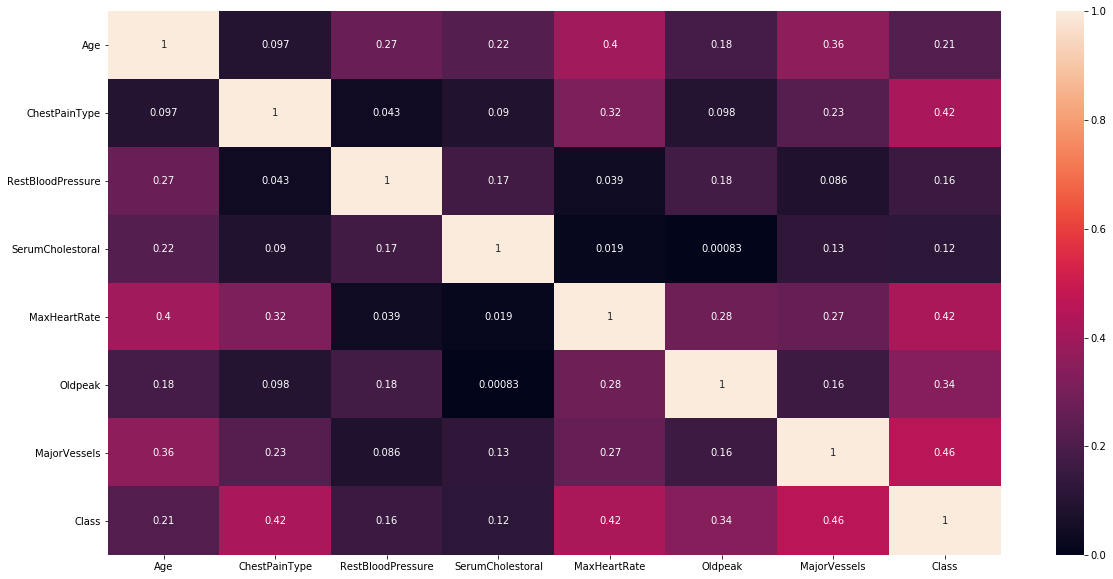

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr().abs(),  annot=True)
plt.show()

In [26]:
import pandas_profiling
dataset.profile_report()

### Making Plots Based grouped by class

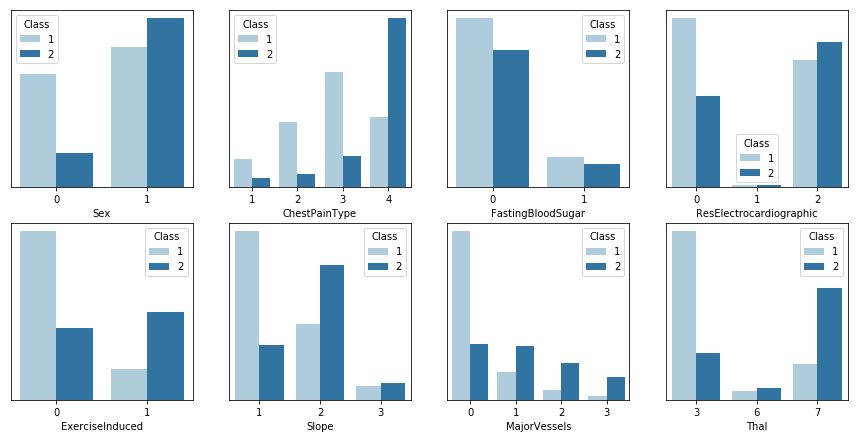

In [6]:
categoricalColumns = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'ResElectrocardiographic', 'ExerciseInduced', 'Slope', 'MajorVessels', 'Thal']
matplotlib.rcParams['figure.figsize']=(15,15)
for i in range(len(categoricalColumns)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=dataset[categoricalColumns[i]], hue='Class', data=dataset, palette='Paired')
    plt.yticks([])
    plt.ylabel('')
plt.show()

MajorVessels and ChestPainType are ordinal categorical, so we can treat them as numerical columns

In [7]:
for i in categoricalColumns:
    dataset[categoricalColumns] = dataset[categoricalColumns].astype('category')
dataset[categoricalColumns].describe()

,Sex,ChestPainType,FastingBloodSugar,ResElectrocardiographic,ExerciseInduced,Slope,MajorVessels,Thal
count,270,270,270,270,270,270,270,270
unique,2,4,2,3,2,3,4,3
top,1,4,0,2,0,1,0,3
freq,183,129,230,137,181,130,160,152


In [8]:
categoricalColumns = np.setdiff1d(categoricalColumns, ['MajorVessels', 'ChestPainType'])
categoricalColumns

array(['ExerciseInduced', 'FastingBloodSugar', 'ResElectrocardiographic',
       'Sex', 'Slope', 'Thal'], dtype='<U23')

In [9]:
numericalColumns = np.setdiff1d(dataset.columns[:-1], categoricalColumns)
numericalColumns

array(['Age', 'ChestPainType', 'MajorVessels', 'MaxHeartRate', 'Oldpeak',
       'RestBloodPressure', 'SerumCholestoral'], dtype=object)

In [10]:
X_cols = np.append(numericalColumns, categoricalColumns)
y_cols = np.array(['Class'])
X_cols, y_cols

(array(['Age', 'ChestPainType', 'MajorVessels', 'MaxHeartRate', 'Oldpeak',
        'RestBloodPressure', 'SerumCholestoral', 'ExerciseInduced',
        'FastingBloodSugar', 'ResElectrocardiographic', 'Sex', 'Slope',
        'Thal'], dtype=object), array(['Class'], dtype='<U5'))

In [11]:
X = dataset[X_cols]
y = dataset[y_cols]-1
X.head()

,Age,ChestPainType,MajorVessels,MaxHeartRate,Oldpeak,RestBloodPressure,SerumCholestoral,ExerciseInduced,FastingBloodSugar,ResElectrocardiographic,Sex,Slope,Thal
0,70,4,3,109,24,130,322,0,0,2,1,2,3
1,67,3,0,160,16,115,564,0,0,2,0,2,7
2,57,2,0,141,3,124,261,0,0,0,1,1,7
3,64,4,1,105,2,128,263,1,0,0,1,2,7
4,74,2,1,121,2,120,269,1,0,2,0,1,3


In [12]:
y.head()

,Class
0,1
1,0
2,1
3,0
4,0


# Making single layer perceptron

## Making normal weights

In [13]:
weights = np.random.normal(0, 1, dataset.shape[1])
# weights = np.ones(len(numericalColumns)+1)
weights

array([-1.003264  ,  0.361288  ,  0.52988889,  0.71399028, -1.68375663,
        0.46674017, -0.12666413, -0.68500701,  0.25906214,  1.7929481 ,
        0.18628733,  0.67200895, -0.88845812,  0.23255116])

In [14]:
bias = 1
bias

1

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[numericalColumns] = scaler.fit_transform(dataset[numericalColumns].values)
dataset.head()

/home/maybeabhishek/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,0.854167,1,1.000000,0.339623,0.447489,0,2,0.290076,0,0.387097,2,1.000000,3,2
1,0.791667,0,0.666667,0.198113,1.000000,0,2,0.679389,0,0.258065,2,0.000000,7,1
2,0.583333,1,0.333333,0.283019,0.308219,0,0,0.534351,0,0.048387,1,0.000000,7,2
3,0.729167,1,1.000000,0.320755,0.312785,0,0,0.259542,1,0.032258,2,0.333333,7,1
4,0.937500,0,0.333333,0.245283,0.326484,0,2,0.381679,1,0.032258,1,0.333333,3,1


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def add(arr1, arr2):
    arr3 = []
    for i in range(len(arr1)):
        arr3.append(arr1[i]+arr2[i])
    return arr3

iterations = 100
learningRate=0.01
weightsHistory = []
predHistory = []
costHistory = []
deltaWHistory=[]
for i in range(iterations):
    if i%5==0:
        print("Progress: {}%".format((i/iterations)*100))
    cost = 0
    for i in range(len(dataset)):
        # Make prediction
        X = dataset[X_cols].values[i]
        X = np.insert(X, 0, 1)
        y = dataset['Class'][i]-1

        pred = np.dot(weights, X)
        # newWeights = np.multiply(np.multiply(learningRate,weights), (y-pred))
        err = (y-pred)
        deltaW = np.multiply(err, X)
        deltaWHistory.append(deltaW)
        weights = np.add(weights, learningRate*deltaW)
        weightsHistory.append(weights)
        predHistory.append(pred)
        cost += (pred-y)
    cost = 2/dataset.shape[0]*cost
    costHistory.append(cost)
print("Completed")

Progress: 0.0%
Progress: 5.0%
Progress: 10.0%
Progress: 15.0%
Progress: 20.0%
Progress: 25.0%
Progress: 30.0%
Progress: 35.0%
Progress: 40.0%
Progress: 45.0%
Progress: 50.0%
Progress: 55.00000000000001%
Progress: 60.0%
Progress: 65.0%
Progress: 70.0%
Progress: 75.0%
Progress: 80.0%
Progress: 85.0%
Progress: 90.0%
Progress: 95.0%
Completed


In [17]:
weights

array([-0.3728269069944496, -0.029991923290542004, 0.26348024513998786,
       0.36815782495240673, -0.35037265707648246, 0.3851096432920866,
       0.17897692401473292, 0.26063255207039504, 0.12876915746430295,
       -0.12188767090968777, 0.06184221464354764, 0.1264922395726264,
       0.05662502961390909, 0.024736006953947096], dtype=object)

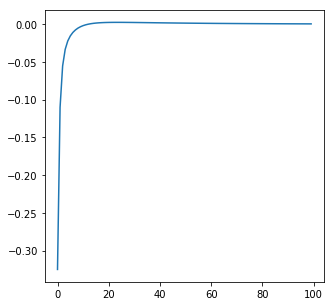

In [18]:
matplotlib.rcParams['figure.figsize']=(5, 5)
plt.plot(costHistory)
plt.show()

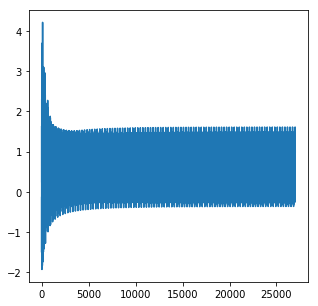

In [19]:
plt.plot(predHistory)

In [20]:
weightsHistory = np.array(weightsHistory)
weightsHistory

array([[-0.9918364082517825, 0.37104907115572566, 0.5413164839683648,
        ..., 0.6834365374202097, -0.8656029456239354, 0.2668339338476407],
       [-0.9767704415347178, 0.38297629480673523, 0.5513604617797413,
        ..., 0.6834365374202097, -0.8354710121898059, 0.3722957008670938],
       [-0.9745319092477847, 0.3842821053074463, 0.552106639208719, ...,
        0.6856750697071429, -0.8332324799028727, 0.38796542687562613],
       ...,
       [-0.3692679726851181, -0.027909551637291814, 0.2670391794493194,
        ..., 0.13005117388195794, 0.06374289823257218,
        0.04599850920151856],
       [-0.372796539124977, -0.029967882060542864, 0.26351061300946044,
        ..., 0.126522607442099, 0.056685765352854287,
        0.02482711056236489],
       [-0.3728269069944496, -0.029991923290542004, 0.26348024513998786,
        ..., 0.1264922395726264, 0.05662502961390909,
        0.024736006953947096]], dtype=object)

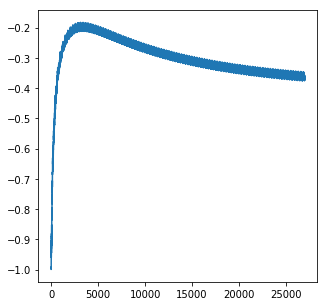

In [21]:
plt.plot(weightsHistory[:, 0])

In [22]:
weights

array([-0.3728269069944496, -0.029991923290542004, 0.26348024513998786,
       0.36815782495240673, -0.35037265707648246, 0.3851096432920866,
       0.17897692401473292, 0.26063255207039504, 0.12876915746430295,
       -0.12188767090968777, 0.06184221464354764, 0.1264922395726264,
       0.05662502961390909, 0.024736006953947096], dtype=object)

In [23]:
y_pred = []
y_actual = []
for i in range(270):
    pred = np.dot(np.insert(dataset[X_cols].values[i], 0, 1), weights)
    y_pred.append(1 if pred>0.5 else 0)
    y_actual.append(dataset['Class'][i]-1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_pred)
cm

array([[147,   3],
       [ 59,  61]])